In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sales.csv")
df.tail()

,index,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [3]:
df.isnull().sum()

index                      0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [4]:
# sua ten + xoa cot index
df = df.iloc[:, 1:]
df = df.rename(
    columns={
        "TV Ad Budget ($)": "TV",
        "Radio Ad Budget ($)": "Radio",
        "Newspaper Ad Budget ($)": "Newspaper",
        "Sales ($)": "Sales",
    }
)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
# tinh do tuong quan
corr_TV = df["Sales"].corr(df["TV"])
corr_TV

np.float64(0.7822244248616061)

In [6]:
corr_newspaper = df["Sales"].corr(df["Newspaper"])
corr_newspaper

np.float64(0.22829902637616528)

In [7]:
corr_Radio = df["Sales"].corr(df["TV"])
corr_Radio

np.float64(0.7822244248616061)

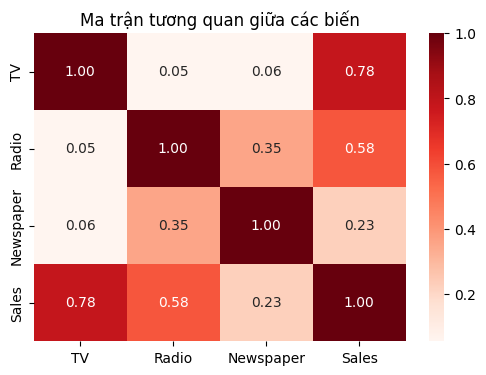

In [8]:
# ve bang tuong quan (heatmap)
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

In [9]:
# tao mo hinh: TV
model = LinearRegression()

X = df[["TV"]]
y = df["Sales"]

# chia tập train : test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# khoi tao va huan luyen model
model.fit(X_train, y_train)

model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# tao duong hoi quy (du doan)
y_pred = model.predict(X_test)

In [11]:
# --- In thông tin mô hình ---
print("Hệ số hồi quy (slope):", model.coef_[0])
print("Hệ số chặn (intercept):", model.intercept_)
print(f"Phương trình: Sales = {model.intercept_:.2f} + {model.coef_[0]:.3f} * TV")

Hệ số hồi quy (slope): 0.046529733705443346
Hệ số chặn (intercept): 7.119638430592953
Phương trình: Sales = 7.12 + 0.047 * TV


In [12]:
# ---------- Đánh giá mô hình --------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse: {mse:.4f}")
print(f"r2: {r2:.4f}")

# so sánh thực tế
comparion = pd.DataFrame({"Thực tế": y_test, "Dự đoán": y_pred})
print(comparion.head())

mse: 10.2047
r2: 0.6767
     Thực tế    Dự đoán
95      16.9  14.717944
15      22.4  16.211548
30      21.4  20.748197
158      7.3   7.664036
128     24.7  17.370139


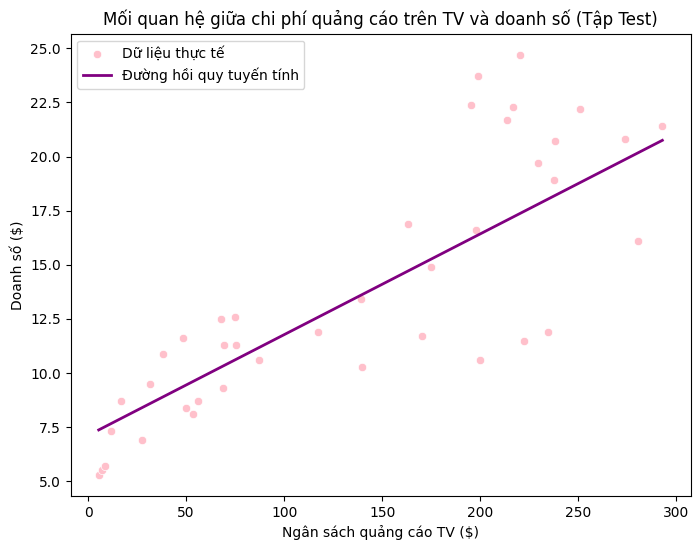

In [13]:
# Tạo DataFrame chứa giá trị thực tế và dự đoán
df_test = pd.DataFrame({
    'TV': X_test['TV'],
    'Doanh_so_thuc_te': y_test,
    'Doanh_so_du_doan': y_pred
})

# Sắp xếp theo giá trị TV để đường hồi quy mượt
df_test = df_test.sort_values(by='TV')

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='TV', y='Doanh_so_thuc_te',
    data=df_test, color='pink', label='Dữ liệu thực tế'
)
plt.plot(
    df_test['TV'], df_test['Doanh_so_du_doan'],
    color='purple', linewidth=2, label='Đường hồi quy tuyến tính'
)
plt.title('Mối quan hệ giữa chi phí quảng cáo trên TV và doanh số (Tập Test)')
plt.xlabel('Ngân sách quảng cáo TV ($)')
plt.ylabel('Doanh số ($)')
plt.legend()
plt.show()